# Part 4 : reading and writing files
- text files
- csv files
- excel(.xlsx) files
- json files
- numpy files
- SAS data sets
- HDF5 (.h5) files

## Text files
Reading and writing text files

In [69]:
## reading text files
with open("./data/raw/text_file2.txt") as file_object:
    text1 = file_object.read()
print(text1)
print("Type of text1 : ", type(text1))
print("\n", file_object)
print("Type of file_object: ", type(file_object))

text1
text2
text3
text4
text5
text6


Type of text1 :  <class 'str'>

 <_io.TextIOWrapper name='./data/raw/text_file2.txt' mode='r' encoding='cp1252'>
Type of file_object:  <class '_io.TextIOWrapper'>


In [70]:
## writing text files to local drive
with open("./data/out/text_out2.txt", 'w') as file_object1:  ## 'w' is write option. You can use 'a' to append.
    file_object1.write("This is great. I can add text using this")  ## write to open text file.  


This is the output. 
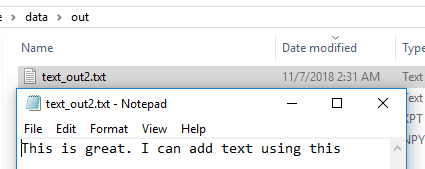

### use dataframe to import and write text files

In [23]:
## Import pandas modules
from pandas import DataFrame
import pandas as pd

Use pandas to import text file into data frame. 
<br>Each columns is tab-delimited
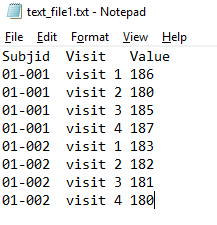

In [47]:
## Reading text (txt) files using pandas read_table method
filename = "./data/raw/text_file1.txt"
txt1 = pd.read_table(filename) ## read text files into dataframe
print(txt1)
print("Type: ", type(txt1))

   Subjid    Visit  Value
0  01-001  visit 1    186
1  01-001  visit 2    180
2  01-001  visit 3    185
3  01-001  visit 4    187
4  01-002  visit 1    183
5  01-002  visit 2    182
6  01-002  visit 3    181
7  01-002  visit 4    180
Type:  <class 'pandas.core.frame.DataFrame'>


In [49]:
## sort txt file by subjid and visit
txt1 = txt1.sort_values(by=['Subjid', 'Visit'])
group1 = txt1.groupby(txt1.Subjid).first()
print(group1)
print(type(group1))

          Visit  Value
Subjid                
01-001  visit 1    186
01-002  visit 1    183
<class 'pandas.core.frame.DataFrame'>


In [59]:
## Baseline and change from baseline addition
txt2 = txt1.copy()
print("Original data : \n", txt2)  ## original data
for col1, group2 in txt2.groupby('Subjid'): ## Nesting into subjid group. Each group has all rows for each subjid
    no_count = 0 
    print("data grouped-by subjid: \n", group2)
    for index, series1 in group2.iterrows(): ## Nesting into each row in subjid-group
        print("Each series on subjid-group: \n", series1)
        if no_count == 0:  ## frist record of each group
            base = txt2.loc[index,'Value']  ## assign baseline
        txt2.loc[index, 'base'] = base  ## assign baseline value to each iteration
        txt2.loc[index, 'chg'] = txt2.loc[index,'Value'] - base  ## calculate change from baseline
        no_count += 1  ## add the count
print("New data with baseline and change from baseline: \n", txt2)    

Original data : 
    Subjid    Visit  Value
0  01-001  visit 1    186
1  01-001  visit 2    180
2  01-001  visit 3    185
3  01-001  visit 4    187
4  01-002  visit 1    183
5  01-002  visit 2    182
6  01-002  visit 3    181
7  01-002  visit 4    180
data grouped-by subjid: 
    Subjid    Visit  Value
0  01-001  visit 1    186
1  01-001  visit 2    180
2  01-001  visit 3    185
3  01-001  visit 4    187
Each series on subjid-group: 
 Subjid     01-001
Visit     visit 1
Value         186
Name: 0, dtype: object
Each series on subjid-group: 
 Subjid     01-001
Visit     visit 2
Value         180
Name: 1, dtype: object
Each series on subjid-group: 
 Subjid     01-001
Visit     visit 3
Value         185
Name: 2, dtype: object
Each series on subjid-group: 
 Subjid     01-001
Visit     visit 4
Value         187
Name: 3, dtype: object
data grouped-by subjid: 
    Subjid    Visit  Value
4  01-002  visit 1    183
5  01-002  visit 2    182
6  01-002  visit 3    181
7  01-002  visit 4    180
Each

### creating text file in local drive
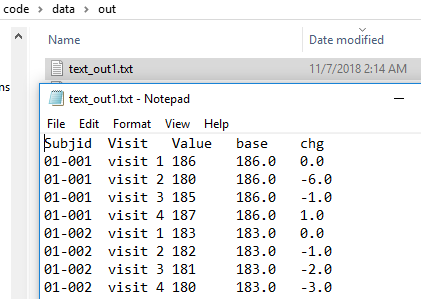


In [63]:
## Writing text files to local drive
txt2.to_csv(r'./data/out/text_out1.txt', header=True, index=None, sep='\t', mode='w') ## include header,tab-delimited, write-mode

## CSV file

In [72]:
## read csv files into data frame
csv1 = pd.read_csv('./data/raw/csv_file1.csv')
print(csv1)

   SUBJID SEX   RACE      ARM    BIRTHDTC
0  01-001   M  Black  Placebo  1990-10-02
1  01-002   F  White   Drug 1  1978-04-19
2  01-003   M  Asian   Drug 2  1985-11-23


In [74]:
print("type of date: ", type(csv1.BIRTHDTC[0]))

type of date:  <class 'str'>


In [73]:
## write data frame to csv files
csv1.to_csv("./data/out/csv_out1.csv", index=False)

## Excel (.xlsx) files

In [81]:
## read csv files into data frame
xlsx1 = pd.read_excel('./data/raw/xlsx_file1.xlsx')
print(xlsx1)

   SUBJID SEX   RACE      ARM    BIRTHDTC FORMAT
0  01-001   M  Black  Placebo  1990-02-23   xsls
1  01-002   F  White   Drug 1  1978-02-05   xsls
2  01-003   M  Asian   Drug 2  1996-11-12   xsls


In [83]:
## add the new column using np.where condition 
xlsx2 = xlsx1.copy()
xlsx2['ARMCD']=np.where(xlsx2.ARM =='Placebo', 'P','D')  ## if xlxs2.ARM == 'Placebo', then xlsx2.ARMCD = 'P', else 'D'
print(xlsx2)

   SUBJID SEX   RACE      ARM    BIRTHDTC FORMAT ARMCD
0  01-001   M  Black  Placebo  1990-02-23   xsls     P
1  01-002   F  White   Drug 1  1978-02-05   xsls     D
2  01-003   M  Asian   Drug 2  1996-11-12   xsls     D


In [86]:
## write data frame into local excel file
writer = pd.ExcelWriter('./data/out/excel_out1.xlsx')
xlsx2.to_excel(writer,'Demographics', index=False)
writer.save()

Saved file in local drive
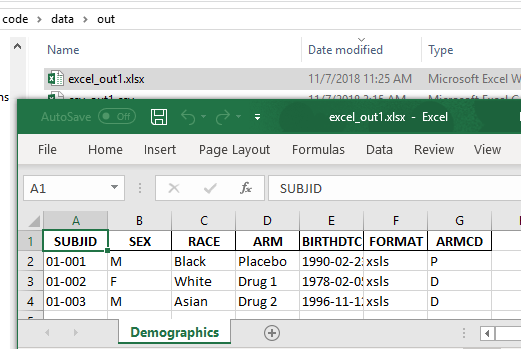

## JSON files
The imported json files could show
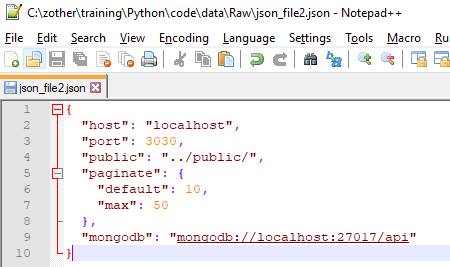
json file will be imported into dictionary. 

In [87]:
import json

In [118]:
with open("./data/raw/json_file2.json","r") as f2:
    jsondata2=json.load(f2)
f2.close()
jsondata2

{'host': 'localhost',
 'mongodb': 'mongodb://localhost:27017/api',
 'paginate': {'default': 10, 'max': 50},
 'port': 3030,
 'public': '../public/'}

In [125]:
print("Type of imported json file is ", type(jsondata2))
df2 = pd.DataFrame.from_dict(jsondata2)
print("\n", df2)
print("\nType is ", type(df2))

Type of imported json file is  <class 'dict'>

               host                        mongodb  paginate  port      public
default  localhost  mongodb://localhost:27017/api        10  3030  ../public/
max      localhost  mongodb://localhost:27017/api        50  3030  ../public/

Type is  <class 'pandas.core.frame.DataFrame'>


In [128]:
## dictionary
raw = {'subjid': ['01-001', '01-002', '01-003', '02-001'],
      'siteid': ['01','01','01','02'],
      'sex': ['M','F','F','M'],
      'age': [29, 40, 35, 56]}
print(raw)
print("\nType is ", type(raw))

{'subjid': ['01-001', '01-002', '01-003', '02-001'], 'siteid': ['01', '01', '01', '02'], 'sex': ['M', 'F', 'F', 'M'], 'age': [29, 40, 35, 56]}

Type is  <class 'dict'>


In [129]:
json3 = json.dumps(raw)
f3 = open("./data/out/json_out1.json","w")
f3.write(json3)
f3.close()

Python dictionary file is saved into json file. 
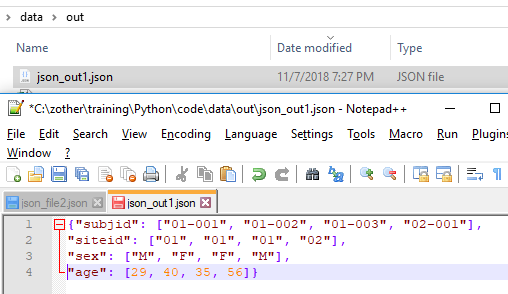

## numpy files
np.save will create files in 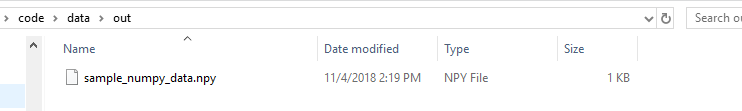

In [2]:
import numpy as np
numpy1 = np.array([1,2,3,4,5,6,7,8,9])
np.save('./data/out/sample_numpy_data', numpy1)

In [3]:
## Reading numpy files in local drive
numpy2 = np.load('./data/out/sample_numpy_data.npy')
numpy2

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Hierchical Data Format (HDF5) files
Binary files that can be easily read and wrote in large number. 
It won't be read by editor like notepad++

In [131]:
import h5py

C:\Users\kevinlee\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [138]:
## Read local HDF file
hdf1 = h5py.File('./data/raw/hdf_file1.h5', "r")
print(hdf1, ". The type is ", type(hdf1))
print("List of datasets in HDF files is", list(hdf1.keys()))  ## List of datasets in HDF5 file

<HDF5 file "hdf_file1.h5" (mode r)> . The type is  <class 'h5py._hl.files.File'>
List of datasets in HDF files is ['list_classes', 'test_set_x', 'test_set_y']


In [143]:
hdf1_1 = hdf1['list_classes']  ## one of datasets in HDF5 files
print(hdf1_1)

<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [151]:
## Extract dataset from HDF5 file
hdf1_2 = hdf1['test_set_x']
print(hdf1_2)
print("Shape is ", hdf1_2.shape)
print("Type is ", type(hdf1_2))
print("Date Type is ", hdf1_2.dtype)

<HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1">
Shape is  (50, 64, 64, 3)
Type is  <class 'h5py._hl.dataset.Dataset'>
Date Type is  uint8


In [154]:
## convert h5py.dataset into array
hdf1_2_array = np.array(hdf1_2)
print(type(hdf1_2_array))
print(hdf1_2_array)

<class 'numpy.ndarray'>
[[[[158 104  83]
   [161 106  85]
   [162 107  84]
   ...
   [170 120 100]
   [167 121 103]
   [172 127 109]]

  [[158 103  82]
   [160 104  82]
   [162 105  83]
   ...
   [169 118  99]
   [164 117  98]
   [168 121 104]]

  [[158 104  82]
   [161 105  82]
   [162 105  83]
   ...
   [173 123 102]
   [169 122 104]
   [168 122 104]]

  ...

  [[102  68  52]
   [ 44  31  23]
   [ 28  23  20]
   ...
   [163 118 102]
   [163 120 103]
   [166 121 105]]

  [[ 99  67  51]
   [ 38  28  22]
   [ 30  26  23]
   ...
   [161 117 100]
   [164 121 104]
   [168 123 106]]

  [[127  95  72]
   [ 39  29  22]
   [ 30  25  22]
   ...
   [165 122 105]
   [169 126 109]
   [173 128 110]]]


 [[[115 110 111]
   [137 129 129]
   [155 146 145]
   ...
   [159 156 157]
   [141 141 145]
   [121 122 127]]

  [[123 118 120]
   [143 136 136]
   [159 153 150]
   ...
   [167 164 165]
   [151 151 154]
   [130 133 137]]

  [[135 130 130]
   [150 145 141]
   [164 159 153]
   ...
   [173 174 172]
   [

In [170]:
## writing HDF file in the local drive
arr1= np.random.randn(10,100)

with h5py.File('./data/out/hdf_out1.h5', 'w') as f:
    dset = f.create_dataset("array1", data=arr1)

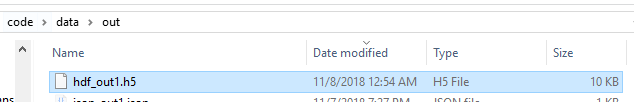

In [179]:
## Reading HDF file from the same drive
with h5py.File('./data/out/hdf_out1.h5', 'r') as f:
    hdf2= f['array1']  ## extract array1 dataset from HDF5 file
    hdf2_array = np.array(hdf2) ## convert to numpy
print(hdf2)  # closed HDF file.  You need to convert inside with statement
print("Type of array1 dataset from HDF file: ", type(hdf2))
print(hdf2_array)

<Closed HDF5 dataset>
<class 'h5py._hl.dataset.Dataset'>
[[ 6.53892251e-01 -1.62507394e+00 -3.41440232e-01  2.93864423e-02
  -8.53193572e-03 -2.40873624e+00  1.45183465e-01 -1.51721417e+00
   8.89981290e-01  2.55747145e-01  4.23813855e-01 -1.00008845e+00
   6.77751341e-01  2.05746355e-01  9.49496517e-02  2.05809145e+00
  -2.13418316e+00 -8.99367898e-02 -1.30040110e-01 -7.85772447e-02
   9.26356064e-01  3.52880043e-01 -1.65324255e+00  1.00625348e+00
   6.21818552e-01  4.75334779e-02  3.89273856e-01  9.61994179e-01
  -7.81581909e-01  1.64407125e+00  9.13301464e-01  1.99837937e-01
   1.07301051e+00 -2.04458771e+00 -1.83366512e-01  5.36752555e-01
   1.02842459e+00  1.77596518e+00  3.23272548e-01 -1.35502387e+00
   7.39333506e-01  8.50390359e-01 -2.50443723e-01 -1.09820363e+00
   5.76031760e-01  1.55064970e+00 -1.53471139e+00  7.34661324e-01
   2.77947590e-02 -7.86493377e-01 -1.24857017e+00  5.96336703e-02
  -5.62376242e-01  1.11863596e+00  1.64851341e+00 -1.98049183e-01
   2.59849070e-01  

# Read and Write SAS datasets from local drive
We will explore how we can read and write SAS datasets from local drive to Python kernel of Jupyter notebook.  
We will discuss three ways to play with SAS datasets
-  pandas.read_sas
-  xport package
-  sas7bdat package

## Read SAS datasets

- [working read](#working-read) <br>
    with SAS7BDAT('./data/in/adtteos.sas7bdat') as file: <br>
    df_dm = file.to_data_frame()
    
    with open('./data/in/dm.xpt', 'rb') as f: <br>
    _xport_dm = xport.to_columns(f) <br>
    _xport_dm2 = pd.DataFrame(_xport_dm)   
    

- [not working read](#not-working-read)        
    with SAS7BDAT('./data/in/dm.xpt') as file: <br>
    df_dm = file.to_data_frame()
    
    with open('./data/in/adtteos.sas7bdat', 'rb') as f: <br>
    _xport_dm3 = xport.to_columns(f)  <br>
    _xport_dm4 = pd.DataFrame(_xport_dm3) <br>
    
    
- [working but not clearly read](#working-but-not-clearly-read)   
    _dm = pd.read_sas('./data/in/dm.xpt') <br>
    _dm = pd.read_sas('./data/in/adtteos.sas7bdat')  <br>
    STUDYID(character) is b'1501'  <br>

In [6]:
### Import modules
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import xport  ## write sas datasets to local drive
from sas7bdat import SAS7BDAT  ## read SAS datasets from local drive

In [7]:
with SAS7BDAT('./data/raw/adtteos.sas7bdat') as file: 
    df_dm = file.to_data_frame()
df_dm.head()

,SUBJID,SITEID,FASFL,SAFFL,TRTP,TRTPN,PARAM,PARAMCD,PARAMTYP,AVISIT,AVISITN,AVAL,STARTDT,ADT,ADTF,CNSR,EVNTDESC
0,310-001,310,Y,Y,Control,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,1.0,2007-11-12,2007-11-12,,0.0,DEATH
1,310-002,310,Y,Y,Control,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,83.0,2008-01-11,2008-04-02,,1.0,COMPLETE PERIOD WITHOUT EVENT
2,310-003,310,Y,Y,Study Drug,2.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,84.0,2008-02-01,2008-04-24,,0.0,DEATH
3,310-004,310,Y,Y,Study Drug,2.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,9.0,2008-02-07,2008-02-15,,0.0,DEATH
4,310-005,310,Y,Y,Study Drug,2.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,51.0,2008-02-21,2008-04-11,,0.0,DEATH


In [15]:
with open('./data/raw/dm.xpt', 'rb') as f: 
    _xport_dm = xport.to_columns(f)
    _xport_dm2 = pd.DataFrame(_xport_dm) 
_xport_dm2.head()


,AGE,AGEU,ARM,ARMCD,COUNTRY,DMDTC,DMDY,DOMAIN,RACE,RFENDTC,RFSTDTC,SEX,SITEID,STUDYID,SUBJID,USUBJID
0,63.0,YEARS,Placebo,Pbo,USA,2013-12-26,-7.0,DM,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",2014-07-02,2014-01-02,F,701,CDISCPILOT01,1015,01-701-1015
1,64.0,YEARS,Placebo,Pbo,USA,2012-07-22,-14.0,DM,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",2012-09-02,2012-08-05,M,701,CDISCPILOT01,1023,01-701-1023
2,71.0,YEARS,Xanomeline High Dose,Xan_Hi,USA,2013-07-11,-8.0,DM,CAUCASIAN,2014-01-14,2013-07-19,M,701,CDISCPILOT01,1028,01-701-1028
3,74.0,YEARS,Xanomeline Low Dose,Xan_Lo,USA,2014-03-10,-8.0,DM,CAUCASIAN,2014-04-14,2014-03-18,M,701,CDISCPILOT01,1033,01-701-1033
4,77.0,YEARS,Xanomeline High Dose,Xan_Hi,USA,2014-06-24,-7.0,DM,CAUCASIAN,2014-12-30,2014-07-01,F,701,CDISCPILOT01,1034,01-701-1034


### working but not clearly read
Below Python function can read SAS datasets, but it has b'' object variables, so this is not ideal way to read SAS datasets

In [9]:
_dm = pd.read_sas('./data/raw/dm.xpt', format='xport')
_dm.head()

,STUDYID,USUBJID,DOMAIN,SUBJID,RFSTDTC,RFENDTC,SITEID,AGE,AGEU,SEX,RACE,ARMCD,ARM,COUNTRY,DMDTC,DMDY
0,b'CDISCPILOT01',b'01-701-1015',b'DM',b'1015',b'2014-01-02',b'2014-07-02',b'701',63.0,b'YEARS',b'F',"b'HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRA...",b'Pbo',b'Placebo',b'USA',b'2013-12-26',-7.0
1,b'CDISCPILOT01',b'01-701-1023',b'DM',b'1023',b'2012-08-05',b'2012-09-02',b'701',64.0,b'YEARS',b'M',"b'HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRA...",b'Pbo',b'Placebo',b'USA',b'2012-07-22',-14.0
2,b'CDISCPILOT01',b'01-701-1028',b'DM',b'1028',b'2013-07-19',b'2014-01-14',b'701',71.0,b'YEARS',b'M',b'CAUCASIAN',b'Xan_Hi',b'Xanomeline High Dose',b'USA',b'2013-07-11',-8.0
3,b'CDISCPILOT01',b'01-701-1033',b'DM',b'1033',b'2014-03-18',b'2014-04-14',b'701',74.0,b'YEARS',b'M',b'CAUCASIAN',b'Xan_Lo',b'Xanomeline Low Dose',b'USA',b'2014-03-10',-8.0
4,b'CDISCPILOT01',b'01-701-1034',b'DM',b'1034',b'2014-07-01',b'2014-12-30',b'701',77.0,b'YEARS',b'F',b'CAUCASIAN',b'Xan_Hi',b'Xanomeline High Dose',b'USA',b'2014-06-24',-7.0


In [10]:
_dm2 = pd.read_sas('./data/raw/adtteos.sas7bdat', format='sas7bdat')
_dm2.head()

,SUBJID,SITEID,FASFL,SAFFL,TRTP,TRTPN,PARAM,PARAMCD,PARAMTYP,AVISIT,AVISITN,AVAL,STARTDT,ADT,ADTF,CNSR,EVNTDESC
0,b'310-001',b'310',b'Y',b'Y',b'Control',1.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,1.0,17482.0,17482.0,NaN,0.0,b'DEATH'
1,b'310-002',b'310',b'Y',b'Y',b'Control',1.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,83.0,17542.0,17624.0,NaN,1.0,b'COMPLETE PERIOD WITHOUT EVENT'
2,b'310-003',b'310',b'Y',b'Y',b'Study Drug',2.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,84.0,17563.0,17646.0,NaN,0.0,b'DEATH'
3,b'310-004',b'310',b'Y',b'Y',b'Study Drug',2.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,9.0,17569.0,17577.0,NaN,0.0,b'DEATH'
4,b'310-005',b'310',b'Y',b'Y',b'Study Drug',2.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,51.0,17583.0,17633.0,NaN,0.0,b'DEATH'


In [19]:
## comparison between 
print(_xport_dm2.AGE[0], " format of data used with SAS7BDAT : ", type(_xport_dm2.AGE[0]))
print(_dm.AGE[0], " format of data used with panda read_sas : ", type(_dm.AGE[0]))

print(_xport_dm2.SEX[0], " format of data used with SAS7BDAT : ", type(_xport_dm2.SEX[0]))
print(_dm.SEX[0], " format of data used with panda read_sas : ", type(_dm.SEX[0]))

63.0  format of data used with SAS7BDAT :  <class 'numpy.float64'>
63.0  format of data used with panda read_sas :  <class 'numpy.float64'>
F  format of data used with SAS7BDAT :  <class 'str'>
b'F'  format of data used with panda read_sas :  <class 'bytes'>


## Write SAS datasets
You can write SAS datasets using xport option.  Currently, only xpt format can be created in local drive.

In [20]:
## Write SAS datasets to local drive
with open('./data/out/xport_demo.xpt', 'wb') as f:
    xport.from_dataframe(_xport_dm2, f)

Python xport function can create SAS xport dataset in local drive.
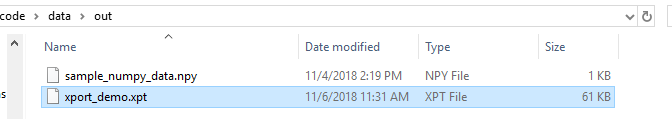